By Po-Yu Lin

# Build annotation reference from MANE

https://www.nature.com/articles/s41586-022-04558-8#data-availability

In [1]:
import gzip
import pandas as pd

compressed_file_path = ''# put your path to MANE here

with gzip.open(compressed_file_path, "rt") as file:
    lines = file.readlines()

columns = ["Chromosome", "Source", "Feature", "Start", "End", "Score", "Strand", "Frame", "Attributes"]
data = []

for line in lines:
    if not line.startswith("#"):
        fields = line.strip().split("\t")
        data.append(fields)

MANE = pd.DataFrame(data, columns=columns)
display(MANE)

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,Attributes
0,chr1,BestRefSeq,gene,65419,71585,.,+,.,"ID=gene-OR4F5;Dbxref=GeneID:79501,HGNC:HGNC:14..."
1,chr1,BestRefSeq,mRNA,65419,71585,.,+,.,ID=rna-NM_001005484.2;Parent=gene-OR4F5;Dbxref...
2,chr1,BestRefSeq,exon,65419,65433,.,+,.,ID=exon-NM_001005484.2-1;Parent=rna-NM_0010054...
3,chr1,BestRefSeq,exon,65520,65573,.,+,.,ID=exon-NM_001005484.2-2;Parent=rna-NM_0010054...
4,chr1,BestRefSeq,exon,69037,71585,.,+,.,ID=exon-NM_001005484.2-3;Parent=rna-NM_0010054...
...,...,...,...,...,...,...,...,...,...
437323,chr19_KI270930v1_alt,BestRefSeq,CDS,140937,141230,.,-,2,ID=cds-NP_001018091.2-5;Parent=rna-NM_00101808...
437324,chr19_KI270930v1_alt,BestRefSeq,CDS,138714,138764,.,-,2,ID=cds-NP_001018091.2-5;Parent=rna-NM_00101808...
437325,chr19_KI270930v1_alt,BestRefSeq,CDS,135844,135948,.,-,2,ID=cds-NP_001018091.2-5;Parent=rna-NM_00101808...
437326,chr19_KI270930v1_alt,BestRefSeq,CDS,135329,135381,.,-,2,ID=cds-NP_001018091.2-5;Parent=rna-NM_00101808...


In [2]:
import pandas as pd
import re

fields = [
    'ID', 'Parent', 'Dbxref', 'Name', 'description', 'gbkey', 'gene', 'gene_biotype', 'product', 'tag', 'transcript_id']

def parse_attributes(attribute_string):
    attributes = {}
    for field in fields:
        match = re.search(f'{field}=([^;]+)', attribute_string)
        if match:
            attributes[field] = match.group(1)
    if 'Dbxref' in attributes:
        dbxref_values = attributes['Dbxref'].split(',')
        for value in dbxref_values:
            if value.startswith('Ensembl:'):
                attributes['Ensembl'] = value.split(':')[1]
                break
    return attributes

parsed_attributes = MANE['Attributes'].apply(parse_attributes)
parsed_df = pd.DataFrame(parsed_attributes.tolist())

MANE = pd.concat([MANE, parsed_df], axis=1)

display(MANE)

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,Attributes,ID,...,Name,description,gbkey,gene,gene_biotype,Parent,product,tag,transcript_id,Ensembl
0,chr1,BestRefSeq,gene,65419,71585,.,+,.,"ID=gene-OR4F5;Dbxref=GeneID:79501,HGNC:HGNC:14...",gene-OR4F5,...,OR4F5,olfactory receptor family 4 subfamily F member 5,Gene,OR4F5,protein_coding,NaN,NaN,NaN,NaN,NaN
1,chr1,BestRefSeq,mRNA,65419,71585,.,+,.,ID=rna-NM_001005484.2;Parent=gene-OR4F5;Dbxref...,rna-NM_001005484.2,...,NM_001005484.2,NaN,mRNA,OR4F5,NaN,gene-OR4F5,olfactory receptor family 4 subfamily F member 5,MANE Select,NM_001005484.2,ENST00000641515.2
2,chr1,BestRefSeq,exon,65419,65433,.,+,.,ID=exon-NM_001005484.2-1;Parent=rna-NM_0010054...,exon-NM_001005484.2-1,...,NaN,NaN,mRNA,OR4F5,NaN,rna-NM_001005484.2,olfactory receptor family 4 subfamily F member 5,MANE Select,NM_001005484.2,ENST00000641515.2
3,chr1,BestRefSeq,exon,65520,65573,.,+,.,ID=exon-NM_001005484.2-2;Parent=rna-NM_0010054...,exon-NM_001005484.2-2,...,NaN,NaN,mRNA,OR4F5,NaN,rna-NM_001005484.2,olfactory receptor family 4 subfamily F member 5,MANE Select,NM_001005484.2,ENST00000641515.2
4,chr1,BestRefSeq,exon,69037,71585,.,+,.,ID=exon-NM_001005484.2-3;Parent=rna-NM_0010054...,exon-NM_001005484.2-3,...,NaN,NaN,mRNA,OR4F5,NaN,rna-NM_001005484.2,olfactory receptor family 4 subfamily F member 5,MANE Select,NM_001005484.2,ENST00000641515.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437323,chr19_KI270930v1_alt,BestRefSeq,CDS,140937,141230,.,-,2,ID=cds-NP_001018091.2-5;Parent=rna-NM_00101808...,cds-NP_001018091.2-5,...,NP_001018091.2,NaN,CDS,KIR2DL5B,NaN,rna-NM_001018081.2-5,killer cell immunoglobulin-like receptor 2DL5B...,MANE Select,NaN,ENSP00000483362.1
437324,chr19_KI270930v1_alt,BestRefSeq,CDS,138714,138764,.,-,2,ID=cds-NP_001018091.2-5;Parent=rna-NM_00101808...,cds-NP_001018091.2-5,...,NP_001018091.2,NaN,CDS,KIR2DL5B,NaN,rna-NM_001018081.2-5,killer cell immunoglobulin-like receptor 2DL5B...,MANE Select,NaN,ENSP00000483362.1
437325,chr19_KI270930v1_alt,BestRefSeq,CDS,135844,135948,.,-,2,ID=cds-NP_001018091.2-5;Parent=rna-NM_00101808...,cds-NP_001018091.2-5,...,NP_001018091.2,NaN,CDS,KIR2DL5B,NaN,rna-NM_001018081.2-5,killer cell immunoglobulin-like receptor 2DL5B...,MANE Select,NaN,ENSP00000483362.1
437326,chr19_KI270930v1_alt,BestRefSeq,CDS,135329,135381,.,-,2,ID=cds-NP_001018091.2-5;Parent=rna-NM_00101808...,cds-NP_001018091.2-5,...,NP_001018091.2,NaN,CDS,KIR2DL5B,NaN,rna-NM_001018081.2-5,killer cell immunoglobulin-like receptor 2DL5B...,MANE Select,NaN,ENSP00000483362.1


In [3]:
MANE.isna().sum()

Chromosome            0
Source                0
Feature               0
Start                 0
End                   0
Score                 0
Strand                0
Frame                 0
Attributes            0
ID                    0
Dbxref                0
Name             204569
description      417990
gbkey                 0
gene                  0
gene_biotype     417990
Parent            19338
product           19338
tag               19338
transcript_id    213355
Ensembl           19338
dtype: int64

In [4]:
print(MANE['Feature'].unique())

for feature in MANE['Feature'].unique():
    parent = MANE[MANE['Feature']==feature]['Parent']
    parent_type = MANE[MANE['ID'].isin(parent)]['Feature'].unique()
    print(f"{feature:<15} number: {sum(MANE['Feature'] == feature):<10} parent: {str(parent_type):<30}")

['gene' 'mRNA' 'exon' 'CDS' 'lnc_RNA' 'snRNA' 'antisense_RNA'
 'telomerase_RNA' 'RNase_MRP_RNA' 'snoRNA']
gene            number: 19338      parent: []                            
mRNA            number: 19354      parent: ['gene']                      
exon            number: 204569     parent: ['mRNA' 'lnc_RNA' 'snRNA' 'antisense_RNA' 'telomerase_RNA' 'RNase_MRP_RNA'
 'snoRNA']
CDS             number: 194017     parent: ['mRNA']                      
lnc_RNA         number: 39         parent: ['gene']                      
snRNA           number: 3          parent: ['gene']                      
antisense_RNA   number: 5          parent: ['gene']                      
telomerase_RNA  number: 1          parent: ['gene']                      
RNase_MRP_RNA   number: 1          parent: ['gene']                      
snoRNA          number: 1          parent: ['gene']                      


## Build promoter region

In [5]:
import pandas as pd

distance_dict = {'mRNA': 2000, 
                 'lncRNA': 2000,
                 'snoRNA': 500,
                 'snRNA': 500,
                 'telomerase_RNA': 1500,
                 'antisense_RNA': 1500
}
Promoter = MANE[MANE['Feature'].isin(distance_dict.keys())].copy()
Promoter[["Promoter_Start", "Promoter_End"]]=None

def calculate_promoter(row):
    if row["Strand"] == "+":
        tss = int(row["Start"])
        promoter_start = tss - distance_dict[row['Feature']]
        promoter_end = tss
    else: 
        tss = int(row["End"])
        promoter_start = tss
        promoter_end = tss + distance_dict[row['Feature']]
    return promoter_start, promoter_end

Promoter[["Promoter_Start", "Promoter_End"]] = Promoter.apply(calculate_promoter, axis=1, result_type="expand")
Promoter = Promoter.reset_index(drop=True)

display(Promoter)

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,Attributes,ID,...,gbkey,gene,gene_biotype,Parent,product,tag,transcript_id,Ensembl,Promoter_Start,Promoter_End
0,chr1,BestRefSeq,mRNA,65419,71585,.,+,.,ID=rna-NM_001005484.2;Parent=gene-OR4F5;Dbxref...,rna-NM_001005484.2,...,mRNA,OR4F5,NaN,gene-OR4F5,olfactory receptor family 4 subfamily F member 5,MANE Select,NM_001005484.2,ENST00000641515.2,63419,65419
1,chr1,BestRefSeq,mRNA,450740,451678,.,-,.,ID=rna-NM_001005221.2;Parent=gene-OR4F29;Dbxre...,rna-NM_001005221.2,...,mRNA,OR4F29,NaN,gene-OR4F29,olfactory receptor family 4 subfamily F member 29,MANE Select,NM_001005221.2,ENST00000426406.4,451678,453678
2,chr1,BestRefSeq,mRNA,685716,686654,.,-,.,ID=rna-NM_001005277.1;Parent=gene-OR4F16;Dbxre...,rna-NM_001005277.1,...,mRNA,OR4F16,NaN,gene-OR4F16,olfactory receptor family 4 subfamily F member 16,MANE Select,NM_001005277.1,ENST00000332831.5,686654,688654
3,chr1,BestRefSeq,mRNA,923923,944574,.,+,.,ID=rna-NM_001385641.1;Parent=gene-SAMD11;Dbxre...,rna-NM_001385641.1,...,mRNA,SAMD11,NaN,gene-SAMD11,sterile alpha motif domain containing 11%2C tr...,MANE Select,NM_001385641.1,ENST00000616016.5,921923,923923
4,chr1,BestRefSeq,mRNA,944203,959256,.,-,.,ID=rna-NM_015658.4;Parent=gene-NOC2L;Dbxref=En...,rna-NM_015658.4,...,mRNA,NOC2L,NaN,gene-NOC2L,NOC2 like nucleolar associated transcriptional...,MANE Select,NM_015658.4,ENST00000327044.7,959256,961256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19359,chr19_KI270890v1_alt,BestRefSeq,mRNA,53906,63370,.,-,.,ID=rna-NM_020535.3-5;Parent=gene-KIR2DL5A-5;Db...,rna-NM_020535.3-5,...,mRNA,KIR2DL5A,NaN,gene-KIR2DL5A-5,killer cell immunoglobulin like receptor%2C tw...,MANE Select,NM_020535.3,ENST00000613155.1,63370,65370
19360,chr19_KI270915v1_alt,BestRefSeq,mRNA,20467,36357,.,-,.,ID=rna-NM_012314.6-9;Parent=gene-KIR2DS4-23;Db...,rna-NM_012314.6-9,...,mRNA,KIR2DS4,NaN,gene-KIR2DS4-23,killer cell immunoglobulin like receptor%2C tw...,MANE Select,NM_012314.6,ENST00000619771.2,36357,38357
19361,chr19_KI270916v1_alt,BestRefSeq,mRNA,21201,35215,.,-,.,ID=rna-NM_014512.1-9;Parent=gene-KIR2DS1-10;Db...,rna-NM_014512.1-9,...,mRNA,KIR2DS1,NaN,gene-KIR2DS1-10,killer cell immunoglobulin like receptor%2C tw...,MANE Select,NM_014512.1,ENST00000621207.1,35215,37215
19362,chr19_KI270916v1_alt,BestRefSeq,mRNA,113706,128262,.,-,.,ID=rna-NM_014219.3-4;Parent=gene-KIR2DL2-7;Dbx...,rna-NM_014219.3-4,...,mRNA,KIR2DL2,NaN,gene-KIR2DL2-7,killer cell immunoglobulin like receptor%2C tw...,MANE Select,NM_014219.3,ENST00000612594.3,128262,130262


# ClinVar tab txt file

In [6]:
import pandas as pd

ClinVar = pd.read_csv("variant_summary.txt.gz", # put the dir of your clinvar file here
                      sep='\t', dtype={'Chromosome': str}, low_memory=False, compression='gzip') 

display(ClinVar)

,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,AlternateAlleleVCF,SomaticClinicalImpact,SomaticClinicalImpactLastEvaluated,ReviewStatusClinicalImpact,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity,SCVsForAggregateGermlineClassification,SCVsForAggregateSomaticClinicalImpact,SCVsForAggregateOncogenicityClassification
0,15041,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,9907,AP5Z1,HGNC:22197,Pathogenic/Likely pathogenic,1,"Dec 17, 2024",397704705,...,TGCTGTAAACTGTAACTGTAAA,-,-,-,-,-,-,SCV001451119|SCV005622007|SCV005909190,-,-
1,15041,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,9907,AP5Z1,HGNC:22197,Pathogenic/Likely pathogenic,1,"Dec 17, 2024",397704705,...,TGCTGTAAACTGTAACTGTAAA,-,-,-,-,-,-,SCV001451119|SCV005622007|SCV005909190,-,-
2,15042,Deletion,NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs),9907,AP5Z1,HGNC:22197,Pathogenic,1,"Jun 29, 2010",397704709,...,G,-,-,-,-,-,-,SCV000020156,-,-
3,15042,Deletion,NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs),9907,AP5Z1,HGNC:22197,Pathogenic,1,"Jun 29, 2010",397704709,...,G,-,-,-,-,-,-,SCV000020156,-,-
4,15043,single nucleotide variant,NM_014630.3(ZNF592):c.3136G>A (p.Gly1046Arg),9640,ZNF592,HGNC:28986,Uncertain significance,0,"Jun 29, 2015",150829393,...,A,-,-,-,-,-,-,SCV000020157,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7101686,4012576,single nucleotide variant,NM_004098.4(EMX2):c.115G>T (p.Ala39Ser),2018,EMX2,HGNC:3341,Likely benign,0,"May 01, 2025",-1,...,T,-,-,-,-,-,-,SCV006070530,-,-
7101687,4012577,single nucleotide variant,NM_004098.4(EMX2):c.22C>A (p.Arg8Ser),2018,EMX2,HGNC:3341,Uncertain significance,0,"May 01, 2025",-1,...,A,-,-,-,-,-,-,SCV006070526,-,-
7101688,4012577,single nucleotide variant,NM_004098.4(EMX2):c.22C>A (p.Arg8Ser),2018,EMX2,HGNC:3341,Uncertain significance,0,"May 01, 2025",-1,...,A,-,-,-,-,-,-,SCV006070526,-,-
7101689,4012578,single nucleotide variant,NM_004098.4(EMX2):c.524A>C (p.Lys175Thr),2018,EMX2,HGNC:3341,Likely benign,0,"May 01, 2025",-1,...,C,-,-,-,-,-,-,SCV006070531,-,-


In [7]:
for col in ClinVar.columns:
    print(col)
    print(ClinVar[col].unique())
    print()

#AlleleID
[  15041   15042   15043 ... 4012576 4012577 4012578]

Type
['Indel' 'Deletion' 'single nucleotide variant' 'Duplication'
 'Microsatellite' 'Insertion' 'Variation' 'Complex' 'Translocation'
 'Inversion' 'copy number gain' 'fusion' 'copy number loss' 'protein only'
 'Tandem duplication']

Name
['NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTAACTGTAAA (p.Arg27_Ile28delinsLeuLeuTer)'
 'NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs)'
 'NM_014630.3(ZNF592):c.3136G>A (p.Gly1046Arg)' ...
 'NM_004098.4(EMX2):c.115G>T (p.Ala39Ser)'
 'NM_004098.4(EMX2):c.22C>A (p.Arg8Ser)'
 'NM_004098.4(EMX2):c.524A>C (p.Lys175Thr)']

GeneID
[     9907      9640     55572 ... 105378580 107984757 121847985]

GeneSymbol
['AP5Z1' 'ZNF592' 'FOXRED1' ... 'HCCS-DT' 'ARSB;LOC129994126'
 'subset of 16 genes: AVPR2:FLNA:MECP2:NAA10']

HGNC_ID
['HGNC:22197' 'HGNC:28986' 'HGNC:26927' ... 'HGNC:50701' 'HGNC:55420'
 'HGNC:55698']

ClinicalSignificance
['Pathogenic/Likely pathogenic' 'Pathogenic' 'Uncertain significa

In [8]:
ClinVar = ClinVar[ClinVar['Assembly'] == 'GRCh38']
print('GRCh38', ClinVar.shape[0])

GRCh38 3518986


In [9]:
ClinVar = ClinVar[ClinVar['OriginSimple']!='somatic'].reset_index(drop=True)
print('Exclude somatic', len(ClinVar), 'remain')

Exclude somatic 3512880 remain


In [10]:
basic_chromosome = list(map(str, range(1,23))) + ['X', 'Y']
ClinVar = ClinVar[ClinVar['Chromosome'].isin(basic_chromosome)]
    
print('Basic Chromosome', ClinVar.shape[0])

Basic Chromosome 3509918


In [11]:
for mut in ClinVar['Type'].unique():
    print(mut, ClinVar[ClinVar['Type']==mut].shape[0])

Indel 16642
Deletion 142028
single nucleotide variant 3222854
Duplication 63969
Microsatellite 36104
Insertion 12866
Translocation 18
Variation 355
Inversion 1399
copy number gain 6940
copy number loss 6739
Complex 4


In [12]:
ClinVar = ClinVar[ClinVar['Type'] == 'single nucleotide variant']
print('single nucleotide variant', ClinVar.shape[0])

single nucleotide variant 3222854


In [13]:
import numpy as np

REVIEW_STATUS_TO_GOLD_STARS = {
    'criteria provided, single submitter': 1,
    'criteria provided, multiple submitters, no conflicts': 2,
    'criteria provided, conflicting interpretations': 1,
    'no assertion criteria provided': np.nan,
    'reviewed by expert panel': 3,
    'no assertion provided': np.nan,
    'no interpretation for the single variant': np.nan,
    'practice guideline': 4,
    }

CLINICAL_SIGNIFICANCE_TO_LABEL = {
    'Benign': 0,
    'Likely benign': 0.1,
    'Benign/Likely benign': 0.1,
    'Pathogenic': 1,
    'Likely pathogenic': 1.1,
    'Pathogenic/Likely pathogenic': 1.1,
    'Uncertain significance': 2
    }

ClinVar['ClinVar_annotation'] = ClinVar['ClinicalSignificance'].map(CLINICAL_SIGNIFICANCE_TO_LABEL)

# Use only pathogenic and benign annotation 
ClinVar = ClinVar[ClinVar['ClinVar_annotation'].isin({0, 1})]

ClinVar['gold_stars'] = ClinVar['ReviewStatus'].map(REVIEW_STATUS_TO_GOLD_STARS)
print('Total Number:\t', len(ClinVar))
print('Benign:\t\t', len(ClinVar[ClinVar['ClinVar_annotation']==0]))
# print('Likely Benign:\t\t', len(ClinVar[ClinVar['ClinVar_annotation']==0.1]))
print('Pathogenic:\t', len(ClinVar[ClinVar['ClinVar_annotation']==1]))
# print('Likely Pathogenic:\t', len(ClinVar[ClinVar['ClinVar_annotation']==1.1]))
# print('VUS:\t\t', len(ClinVar[ClinVar['ClinVar_annotation']==2]))

print(ClinVar.shape[0])

Total Number:	 259617
Benign:		 180354
Pathogenic:	 79263
259617


# Annotate with MANE

In [14]:
columns_to_keep = ['Name', 'GeneSymbol', 'RS# (dbSNP)', 'RCVaccession', 
                   'PhenotypeIDS', 'PhenotypeList', 'Assembly', 
                   'ChromosomeAccession', 'Chromosome', 'Start', 'Stop', 'ReferenceAllele', 'AlternateAllele',
                   'VariationID', 'PositionVCF', 'ReferenceAlleleVCF', 'AlternateAlleleVCF', 'ClinVar_annotation', 'gold_stars']

ClinVar_annotation = ClinVar[columns_to_keep].copy().reset_index(drop=True)
ClinVar_annotation

,Name,GeneSymbol,RS# (dbSNP),RCVaccession,PhenotypeIDS,PhenotypeList,Assembly,ChromosomeAccession,Chromosome,Start,Stop,ReferenceAllele,AlternateAllele,VariationID,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,ClinVar_annotation,gold_stars
0,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),FOXRED1,267606829,RCV000000015|RCV000578659|RCV001194045|RCV0033...,"MONDO:MONDO:0032624,MedGen:C4748791,OMIM:61824...","Mitochondrial complex 1 deficiency, nuclear ty...",GRCh38,NC_000011.10,11,126275389,126275389,na,na,5,126275389,C,T,1.0,2.0
1,NM_000410.4(HFE):c.892+48G>A,HFE,1800758,RCV000000031|RCV001618204,|MedGen:C3661900,HFE INTRONIC POLYMORPHISM|not provided,GRCh38,NC_000006.12,6,26093008,26093008,na,na,14,26093008,G,A,0.0,1.0
2,NM_000410.4(HFE):c.989G>T (p.Arg330Met),HFE,111033558,RCV000000035,"MONDO:MONDO:0021001,MedGen:C3469186,OMIM:23520...",Hemochromatosis type 1,GRCh38,NC_000006.12,6,26093215,26093215,na,na,18,26093215,G,T,1.0,NaN
3,NM_020779.4(WDR35):c.25-2A>G,WDR35,397515534,RCV000000037,"MONDO:MONDO:0013323,MedGen:C3150874,OMIM:61361...",Cranioectodermal dysplasia 2,GRCh38,NC_000002.12,2,19989284,19989284,na,na,20,19989284,T,C,1.0,NaN
4,NM_020779.4(WDR35):c.1844A>G (p.Glu615Gly),WDR35,267607174,RCV000000038,"MONDO:MONDO:0013323,MedGen:C3150874,OMIM:61361...",Cranioectodermal dysplasia 2,GRCh38,NC_000002.12,2,19945787,19945787,na,na,21,19945787,T,C,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259612,NM_001733.7(C1R):c.156G>A (p.Thr52=),C1R,-1,RCV005409552,MedGen:CN169374,not specified,GRCh38,NC_000012.12,12,7091527,7091527,na,na,3896647,7091527,C,T,0.0,1.0
259613,NM_005006.7(NDUFS1):c.2029C>T (p.Gln677Ter),NDUFS1,-1,RCV005409569,"MONDO:MONDO:0032610,MedGen:C4748754,OMIM:618226","Mitochondrial complex 1 deficiency, nuclear ty...",GRCh38,NC_000002.12,2,206126602,206126602,na,na,3896664,206126602,G,A,1.0,1.0
259614,NM_001080472.4(FITM2):c.367C>T (p.Gln123Ter),FITM2,-1,RCV005409572,"MONDO:MONDO:0032842,MedGen:C5231435,OMIM:618635",Siddiqi syndrome,GRCh38,NC_000020.11,20,44307047,44307047,na,na,3896667,44307047,G,A,1.0,1.0
259615,NM_001009944.3(PKD1):c.7136A>G (p.Tyr2379Cys),PKD1,-1,RCV005406692,"MONDO:MONDO:0008263,MedGen:C3149841,OMIM:173900","Polycystic kidney disease, adult type",GRCh38,NC_000016.10,16,2106878,2106878,na,na,3896691,2106878,T,C,1.0,1.0


gene:
- mRNA: CDS, exon
- lnc_RNA: exon
- snRNA: exon
- antisense_RNA: exon
- telomerase_RNA: exon
- RNase_MRP_RNA: exon
- snoRNA: exon  
['gene' 'mRNA' 'exon' 'CDS' 'lnc_RNA' 'snRNA' 'antisense_RNA'
 'telomerase_RNA' 'RNase_MRP_RNA' 'snoRNA']

In [15]:
import pandas as pd
from multiprocessing import Pool, cpu_count
from tqdm import tqdm

annotation_columns = ['gene', 
                      'mRNA', 'mRNA_promoter', 'mRNA_exon', 
                            'coding_sequence', 'start_codon', 'stop_codon', 'five_prime_UTR', 'three_prime_UTR', 'mRNA_intron', 'mRNA_splice',
                      'lncRNA', 'lncRNA_promoter', 'lncRNA_exon', 
                      'snRNA', 'snRNA_promoter', 'snRNA_exon', 
                      'antisenseRNA', 'antisenseRNA_promoter', 'antisenseRNA_exon', 
                      'telomeraseRNA', 'telomeraseRNA_promoter', 'telomeraseRNA_exon', 
                      'RNaseMRPRNA', 'RNaseMRPRNA_promoter', 'RNaseMRPRNA_exon', 
                      'snoRNA', 'snoRNA_promoter', 'snoRNA_exon', 
                      'other']

def match_variants(row):
    chrom = row["Chromosome"]
    pos = int(row["PositionVCF"])
    annotation = MANE[((MANE["Chromosome"] == f'chr{chrom}') & 
                       (MANE["Start"].astype(int) <= pos) & 
                       (MANE["End"].astype(int) >= pos))]
    
    annotation_promoter = Promoter[((Promoter["Chromosome"] == chrom) & 
                                    (Promoter["Promoter_Start"].astype(int) <= pos) & 
                                    (Promoter["Promoter_End"].astype(int) >= pos))]
    
    if annotation.empty and annotation_promoter.empty:
        row['other'] = 1
        return row

    types = annotation['Feature'].unique()
    types_promoter = annotation_promoter['Feature'].unique()
    
    if "gene" in types:
        row['gene'] = 1
    
    if "mRNA" in types:
        row['mRNA'] = 1
        transcript_ids = set(annotation[annotation['Feature'] == "mRNA"]["transcript_id"].dropna())
        row['transcript_set'].update(transcript_ids)

        for transcript_id in transcript_ids:
            strand = annotation[annotation['ID']==f'rna-{transcript_id}']['Strand'].iloc[0]
            annotation_mRNA_exon = annotation[((annotation['Parent']==f'rna-{transcript_id}') & 
                                               (annotation['Feature'] == "exon"))]
            annotation_mRNA_CDS = annotation[((annotation['Parent']==f'rna-{transcript_id}') & 
                                               (annotation['Feature'] == "CDS"))]
            transcript_exon = MANE[((MANE['Parent']==f'rna-{transcript_id}') & 
                                    (MANE['Feature'] == "exon"))]
            transcript_CDS = MANE[((MANE['Parent']==f'rna-{transcript_id}') & 
                                   (MANE['Feature'] == "CDS"))]

            if (not annotation_mRNA_CDS.empty) and (not annotation_mRNA_exon.empty): # So it is exon and coding sequence
                row['mRNA_exon'] = 1
                row['coding_sequence'] = 1
                
                if strand=="+":
                    start_1 = min(transcript_CDS['Start'].astype(int))
                    if (pos <= start_1+2) and (pos >= start_1):
                        row['start_codon'] = 1
                    stop_3 = max(transcript_CDS['End'].astype(int))
                    if (pos >= stop_3-2) and (pos <= stop_3):
                        row['stop_codon'] = 1
                else: #strand=="-"
                    start_1 = max(transcript_CDS['End'].astype(int))
                    if (pos >= start_1-2) and (pos <= start_1):
                        row['start_codon'] = 1
                    stop_3 = min(transcript_CDS['Start'].astype(int))
                    if (pos <= stop_3+2) and (pos >= stop_3):
                        row['stop_codon'] = 1
                
            elif (annotation_mRNA_CDS.empty) and (not annotation_mRNA_exon.empty): # So it is UTR
                row['mRNA_exon'] = 1
                if strand=="+":
                    fiveUTR_start = min(transcript_exon['Start'].astype(int))
                    fiveUTR_end = min(transcript_CDS['Start'].astype(int))-1
                    if (pos <= fiveUTR_end) and (pos >= fiveUTR_start):
                        row['five_prime_UTR']=1
                    threeUTR_start = max(transcript_CDS['End'].astype(int))+1
                    threeUTR_end = max(transcript_exon['End'].astype(int))
                    if (pos >= threeUTR_start) and (pos <= threeUTR_end):
                        row['three_prime_UTR']=1
                else: #strand=="-"
                    fiveUTR_start = max(transcript_exon['End'].astype(int))
                    fiveUTR_end = max(transcript_CDS['End'].astype(int))+1
                    if (pos >= fiveUTR_end) and (pos <= fiveUTR_start):
                        row['five_prime_UTR']=1
                    threeUTR_start = min(transcript_CDS['Start'].astype(int))-1
                    threeUTR_end = min(transcript_exon['Start'].astype(int))
                    if (pos <= threeUTR_start) and (pos >= threeUTR_end):
                        row['three_prime_UTR']=1

            elif (annotation_mRNA_CDS.empty) and (annotation_mRNA_exon.empty): # So it is intron
                row['mRNA_intron'] = 1
                splice_region = transcript_exon.apply(lambda exon: pos in [int(exon['Start'])-1, 
                                                                           int(exon['Start'])-2, 
                                                                           int(exon['End'])+1, 
                                                                           int(exon['End'])+2], axis=1)
                if splice_region.any():
                    row['mRNA_splice'] = 1

    if "mRNA" in types_promoter:
        row['mRNA_promoter'] = 1
        transcript_ids = set(annotation_promoter[annotation_promoter['Feature'] == "mRNA"]["transcript_id"].dropna())
        row['promoter_transcript_set'].update(transcript_ids)
        
    for rna in ['lncRNA', 'snRNA', 'antisenseRNA', 'telomeraseRNA', 'RNaseMRPRNA', 'snoRNA']:
        if rna in types:
            row[rna]=1
            transcript_ids = set(annotation[annotation['Feature'] == rna]["transcript_id"].dropna())
            row['transcript_set'].update(transcript_ids)
            
            for transcript_id in transcript_ids:
                annotation_RNA_exon = annotation[((annotation['Parent']==f'rna-{transcript_id}') & 
                                                   (annotation['Feature'] == "exon"))]
                if not annotation_RNA_exon.empty:
                    row[f"{rna}_exon"] = 1

        if rna in types_promoter:
            row[f"{rna}_promoter"] = 1
            transcript_ids = set(annotation_promoter[annotation_promoter['Feature'] == rna]["transcript_id"].dropna())
            row['promoter_transcript_set'].update(transcript_ids)
    
    return row

In [16]:
ClinVar_annotation[annotation_columns] = 0
ClinVar_annotation['transcript_set'] = ClinVar_annotation.apply(lambda x: set(), axis=1)
ClinVar_annotation['promoter_transcript_set'] = ClinVar_annotation.apply(lambda x: set(), axis=1)

num_cpus = cpu_count()
with Pool(cpu_count()) as pool:
    results = list(tqdm(pool.imap(match_variants, [row for _, row in ClinVar_annotation.iterrows()]), total=len(ClinVar_annotation)))

ClinVar_annotation = pd.DataFrame(results)

display(ClinVar_annotation)
print(ClinVar_annotation[annotation_columns].sum())

100%|██████████| 259617/259617 [1:27:14<00:00, 49.59it/s]  


,Name,GeneSymbol,RS# (dbSNP),RCVaccession,PhenotypeIDS,PhenotypeList,Assembly,ChromosomeAccession,Chromosome,Start,...,telomeraseRNA_exon,RNaseMRPRNA,RNaseMRPRNA_promoter,RNaseMRPRNA_exon,snoRNA,snoRNA_promoter,snoRNA_exon,other,transcript_set,promoter_transcript_set
0,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),FOXRED1,267606829,RCV000000015|RCV000578659|RCV001194045|RCV0033...,"MONDO:MONDO:0032624,MedGen:C4748791,OMIM:61824...","Mitochondrial complex 1 deficiency, nuclear ty...",GRCh38,NC_000011.10,11,126275389,...,0,0,0,0,0,0,0,0,{NM_017547.4},{}
1,NM_000410.4(HFE):c.892+48G>A,HFE,1800758,RCV000000031|RCV001618204,|MedGen:C3661900,HFE INTRONIC POLYMORPHISM|not provided,GRCh38,NC_000006.12,6,26093008,...,0,0,0,0,0,0,0,0,{NM_000410.4},{}
2,NM_000410.4(HFE):c.989G>T (p.Arg330Met),HFE,111033558,RCV000000035,"MONDO:MONDO:0021001,MedGen:C3469186,OMIM:23520...",Hemochromatosis type 1,GRCh38,NC_000006.12,6,26093215,...,0,0,0,0,0,0,0,0,{NM_000410.4},{}
3,NM_020779.4(WDR35):c.25-2A>G,WDR35,397515534,RCV000000037,"MONDO:MONDO:0013323,MedGen:C3150874,OMIM:61361...",Cranioectodermal dysplasia 2,GRCh38,NC_000002.12,2,19989284,...,0,0,0,0,0,0,0,0,"{NM_001006657.2, NM_020779.4}",{}
4,NM_020779.4(WDR35):c.1844A>G (p.Glu615Gly),WDR35,267607174,RCV000000038,"MONDO:MONDO:0013323,MedGen:C3150874,OMIM:61361...",Cranioectodermal dysplasia 2,GRCh38,NC_000002.12,2,19945787,...,0,0,0,0,0,0,0,0,"{NM_001006657.2, NM_020779.4}",{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259612,NM_001733.7(C1R):c.156G>A (p.Thr52=),C1R,-1,RCV005409552,MedGen:CN169374,not specified,GRCh38,NC_000012.12,12,7091527,...,0,0,0,0,0,0,0,0,{NM_001733.7},{}
259613,NM_005006.7(NDUFS1):c.2029C>T (p.Gln677Ter),NDUFS1,-1,RCV005409569,"MONDO:MONDO:0032610,MedGen:C4748754,OMIM:618226","Mitochondrial complex 1 deficiency, nuclear ty...",GRCh38,NC_000002.12,2,206126602,...,0,0,0,0,0,0,0,0,{NM_005006.7},{}
259614,NM_001080472.4(FITM2):c.367C>T (p.Gln123Ter),FITM2,-1,RCV005409572,"MONDO:MONDO:0032842,MedGen:C5231435,OMIM:618635",Siddiqi syndrome,GRCh38,NC_000020.11,20,44307047,...,0,0,0,0,0,0,0,0,{NM_001080472.4},{}
259615,NM_001009944.3(PKD1):c.7136A>G (p.Tyr2379Cys),PKD1,-1,RCV005406692,"MONDO:MONDO:0008263,MedGen:C3149841,OMIM:173900","Polycystic kidney disease, adult type",GRCh38,NC_000016.10,16,2106878,...,0,0,0,0,0,0,0,0,{NM_001009944.3},{}


gene                      255868
mRNA                      254308
mRNA_promoter                  0
mRNA_exon                 154984
coding_sequence           140285
start_codon                  872
stop_codon                   124
five_prime_UTR              2564
three_prime_UTR            12601
mRNA_intron               100508
mRNA_splice                11078
lncRNA                         0
lncRNA_promoter                0
lncRNA_exon                    0
snRNA                         21
snRNA_promoter                 0
snRNA_exon                    21
antisenseRNA                   0
antisenseRNA_promoter          0
antisenseRNA_exon              0
telomeraseRNA                  0
telomeraseRNA_promoter         0
telomeraseRNA_exon             0
RNaseMRPRNA                    0
RNaseMRPRNA_promoter           0
RNaseMRPRNA_exon               0
snoRNA                        28
snoRNA_promoter                0
snoRNA_exon                   28
other                       3749
dtype: int

In [17]:
columns_to_sum = annotation_columns.copy()

column_sums = ClinVar_annotation[columns_to_sum].sum()

print(column_sums)

gene                      255868
mRNA                      254308
mRNA_promoter                  0
mRNA_exon                 154984
coding_sequence           140285
start_codon                  872
stop_codon                   124
five_prime_UTR              2564
three_prime_UTR            12601
mRNA_intron               100508
mRNA_splice                11078
lncRNA                         0
lncRNA_promoter                0
lncRNA_exon                    0
snRNA                         21
snRNA_promoter                 0
snRNA_exon                    21
antisenseRNA                   0
antisenseRNA_promoter          0
antisenseRNA_exon              0
telomeraseRNA                  0
telomeraseRNA_promoter         0
telomeraseRNA_exon             0
RNaseMRPRNA                    0
RNaseMRPRNA_promoter           0
RNaseMRPRNA_exon               0
snoRNA                        28
snoRNA_promoter                0
snoRNA_exon                   28
other                       3749
dtype: int

In [18]:
import pandas as pd

columns_to_sum = annotation_columns.copy()

ClinVar_annotation['row_sum'] = ClinVar_annotation[columns_to_sum].sum(axis=1)

row_sum_counts = ClinVar_annotation['row_sum'].value_counts().sort_index()

print(row_sum_counts)

row_sum
1      5300
3     88273
4    163386
5      2572
6        86
Name: count, dtype: int64


In [19]:
import pandas as pd
import gzip

ClinVar_annotation.to_csv('AllClinVarBenchmark_202504.csv.gz', index=False, compression='gzip')

In [20]:
non_zero_columns = column_sums[column_sums != 0]
print(non_zero_columns)

gene               255868
mRNA               254308
mRNA_exon          154984
coding_sequence    140285
start_codon           872
stop_codon            124
five_prime_UTR       2564
three_prime_UTR     12601
mRNA_intron        100508
mRNA_splice         11078
snRNA                  21
snRNA_exon             21
snoRNA                 28
snoRNA_exon            28
other                3749
dtype: int64


In [21]:
import pandas as pd

columns_to_sum = non_zero_columns.index

heatmap_data = pd.DataFrame(index=columns_to_sum, columns=columns_to_sum)

for row in columns_to_sum:
    for column in columns_to_sum:
        count = ClinVar_annotation[(ClinVar_annotation[row] == 1) & (ClinVar_annotation[column] == 1)].shape[0]
        heatmap_data.loc[row, column] = count

# print(heatmap_data)

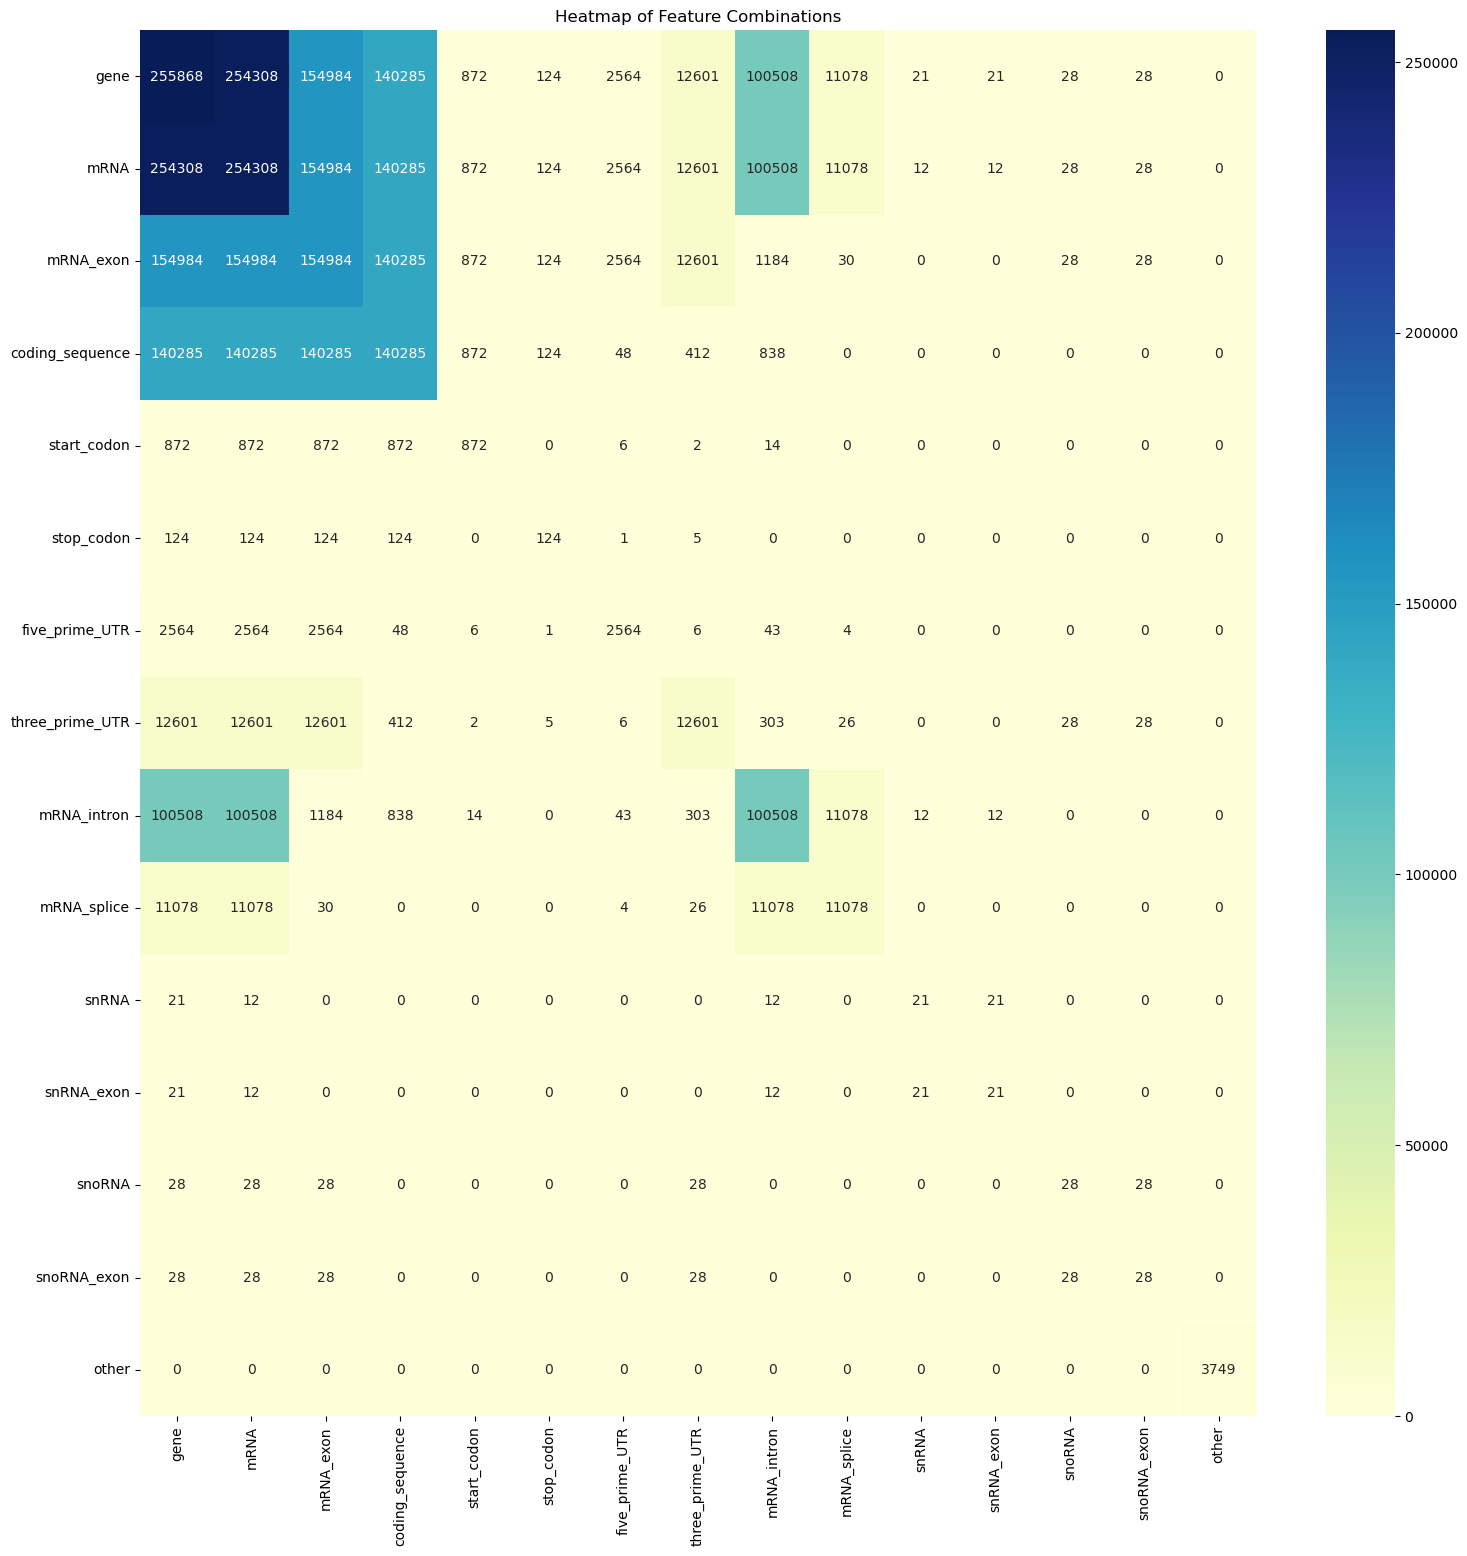

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = heatmap_data.astype(int)

plt.figure(figsize=(18, 18))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Feature Combinations')
plt.show()

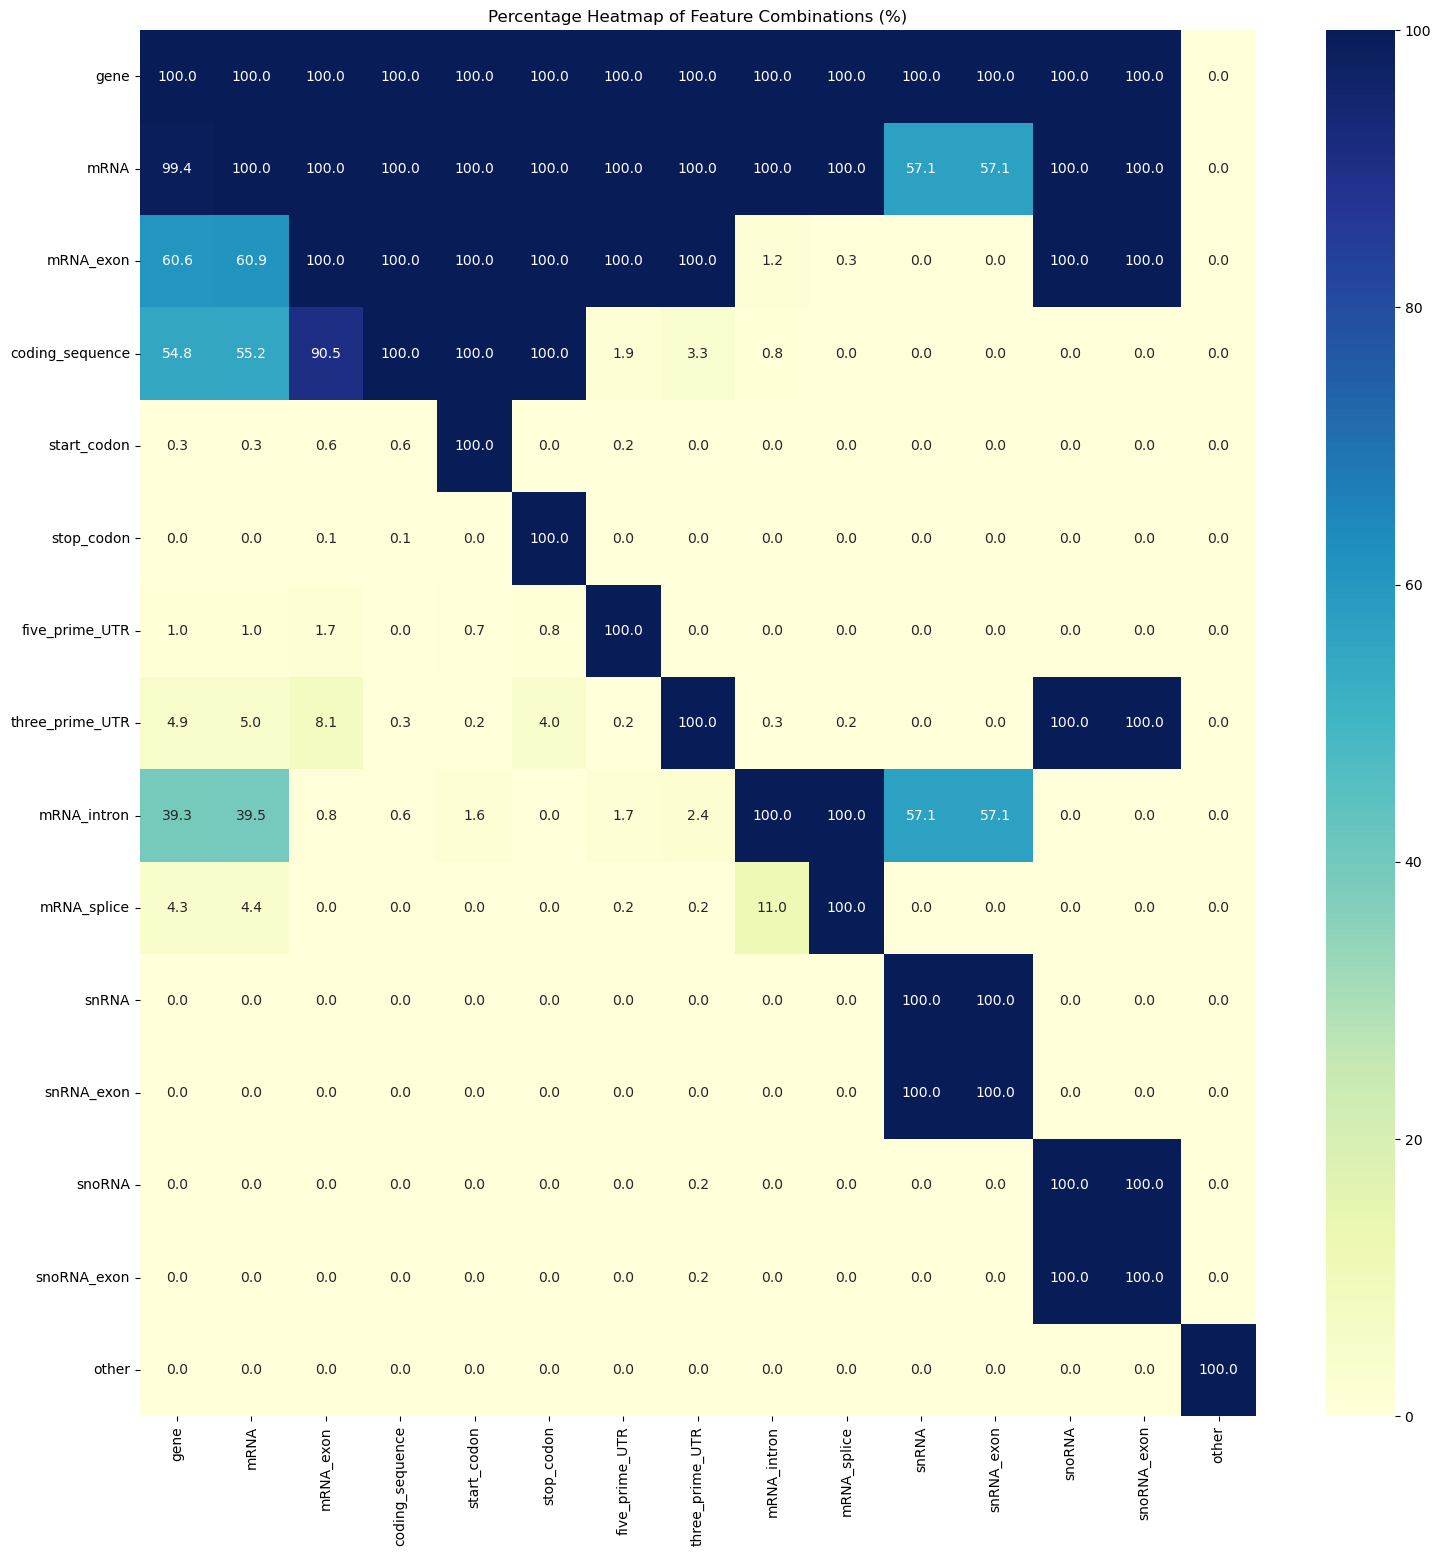

In [23]:
max_values = heatmap_data.max()

percentage_data = heatmap_data.div(max_values, axis=1) * 100

plt.figure(figsize=(18, 18))
sns.heatmap(percentage_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Percentage Heatmap of Feature Combinations (%)')
plt.show()

# Add other information

## Get splicing

In [24]:
import pandas as pd

pattern = r"\d+(\+1|\+2|\-1|\-2)[ATCG]"

ClinVar_annotation['ClinVarName_splice'] = 0

ClinVar_annotation['ClinVarName_splice'] = ClinVar_annotation['Name'].str.contains(pattern, na=False).astype(int)

ClinVar_annotation['ClinVarName_splice'].sum()

/tmp/ipykernel_2631767/382054486.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ClinVar_annotation['ClinVarName_splice'] = ClinVar_annotation['Name'].str.contains(pattern, na=False).astype(int)


11088

## Get noncoding RNA

In [25]:
import pandas as pd

pattern = r"NR_"

ClinVar_annotation['ClinVarName_RNA_gene'] =ClinVar_annotation['Name'].str.contains(pattern, na=False).astype(int)

ClinVar_annotation['ClinVarName_RNA_gene'].sum()

169

## Get protein information

In [26]:
from Bio.SeqUtils import seq1
import re

In [27]:
def ParseAminoAcidChange(variant_name):
    '''
    depend on numpy and re
        import numpy as np
        import re
    Extract from HGVS nomenclature to amino acid change
    '''
    PROTEIN_NAME_PATTERN = re.compile(r'\(p\.(.+)\)')
    protein_changes = PROTEIN_NAME_PATTERN.findall(variant_name)
    
    if len(protein_changes) == 0:
        return np.nan
    else:
        protein_change, = protein_changes
        return protein_change

In [28]:
def ParseRefSeqTemplate(variant_name):
    '''
    depend on re
        import re
    Extract from HGVS name to Ref-Seq template
    '''
    REFSEQ_ID_PATTERN = re.compile(r'NM_\d+\.?\d*')
    return REFSEQ_ID_PATTERN.findall(variant_name)

In [29]:
def strict_seq1(aa3):
    '''
    depend on biopython
        from Bio.SeqUtils import seq1
    '''
    aa1 = seq1(aa3)
    VALID_AA1_SET = set('ACDEFGHIKLMNPQRSTVWY*')
    assert aa1 in VALID_AA1_SET, 'Invalid 3-letter (%s) to 1-letter (%s) conversion.' % (aa3, aa1)
    return aa1

def parse_aa_and_pos(aa_and_pos):
    '''
    depend on biopython
        from Bio.SeqUtils import seq1
    '''
    aa = strict_seq1(aa_and_pos[:3])
    pos = int(aa_and_pos[3:])
    return aa, pos

In [30]:
def series_return(index):
    import pandas as pd
    def _decorator(f):
        def _wrapped(*args, **kwargs):
            return pd.Series(f(*args, **kwargs), index = index)
        return _wrapped
    return _decorator

@series_return(['failed_parsing_protein_change', 'start_pos', 'end_pos', 'start_aa', 'end_aa', 'alt'])
def parse_hgvs_protein_change(raw_protein_change):
    '''
    dependent on numpy, pandas, and re
        import numpy as np
        import pandas as pd
        import re
    Parse HGVS protein change to failed_parsing_protein_change', 'start_pos', 'end_pos', 'start_aa', 'end_aa', 'alt'
    '''
    
    if pd.isnull(raw_protein_change):
        return False, np.nan, np.nan, np.nan, np.nan, np.nan

    try:

        last_digit_pos = list(re.finditer(r'\d', raw_protein_change))[-1].start()
        raw_ref = raw_protein_change[:(last_digit_pos + 1)]
        raw_alt = raw_protein_change[(last_digit_pos + 1):]

        raw_ref_parts = raw_ref.split('_')
        assert 1 <= len(raw_ref_parts) <= 2
        ref_aas, ref_positions = zip(*map(parse_aa_and_pos, raw_ref_parts))
        start, end = ref_positions[0], ref_positions[-1]
        start_aa, end_aa = ref_aas[0], ref_aas[-1]

        if raw_alt.endswith('fs'):
            alt = 'fs'
        elif raw_alt == '=':
            alt = '='
        elif raw_alt == 'dup':
            alt = 'dup'
        else:
            is_insert = ('ins' in raw_alt) and ('del' not in raw_alt)
            raw_alt_aas = raw_alt.replace('del', '').replace('ins', '')
            alt = ''.join(map(strict_seq1, [raw_alt_aas[i:(i + 3)] for i in range(0, len(raw_alt_aas), 3)]))

            if is_insert:
                assert end == start + 1
                alt = start_aa + alt + end_aa

        return False, start, end, start_aa, end_aa, alt
    except:
        return True, np.nan, np.nan, np.nan, np.nan, np.nan

def variant_start_and_end_to_ref_seq(variant):
    if variant['start_pos'] == variant['end_pos']:
        assert variant['start_aa'] == variant['end_aa']
        return variant['start_aa']
    else:
        assert variant['start_pos'] < variant['end_pos'], 'Invalid positions %s-%s' % \
                (variant['start_pos'], variant['end_pos'])
        return variant['start_aa'] + '.*' + variant['end_aa']

In [31]:
import numpy as np

ClinVar_annotation.loc[:,'ClinVarName_raw_protein_change'] = ClinVar_annotation['Name'].apply(ParseAminoAcidChange)
ClinVar_annotation[['ClinVarName_failed_parsing_protein_change', 
                    'ClinVarName_start_pos', 
                    'ClinVarName_end_pos', 
                    'ClinVarName_start_aa', 
                    'ClinVarName_end_aa', 
                    'ClinVarName_alt']] = ClinVar_annotation['ClinVarName_raw_protein_change'].apply(lambda x: pd.Series(parse_hgvs_protein_change(x)))

ClinVar_annotation['ClinVarName_refseq_ids'] = ClinVar_annotation['Name'].apply(ParseRefSeqTemplate)

In [32]:
ClinVar_annotation['ClinVarName_refseq_ids'] = ClinVar_annotation['ClinVarName_refseq_ids'].apply(lambda x: x[0] if len(x) > 0 else None)

In [33]:
ClinVar_annotation['ClinVarName_start_pos'] = pd.to_numeric(ClinVar_annotation['ClinVarName_start_pos'], errors='coerce').astype('Int64')
ClinVar_annotation['ClinVarName_end_pos'] = pd.to_numeric(ClinVar_annotation['ClinVarName_end_pos'], errors='coerce').astype('Int64')

In [34]:
import pandas as pd

ClinVar_annotation['ClinVarName_coding_sequence'] = (
    ClinVar_annotation[['ClinVarName_start_pos', 'ClinVarName_start_aa', 'ClinVarName_alt']]
    .notna()
    .all(axis=1)  
    .astype(int) 
)

display(ClinVar_annotation[['ClinVarName_start_pos', 'ClinVarName_start_aa', 'ClinVarName_alt', 'ClinVarName_coding_sequence']])

,ClinVarName_start_pos,ClinVarName_start_aa,ClinVarName_alt,ClinVarName_coding_sequence
0,232,Q,*,1
1,<NA>,NaN,NaN,0
2,330,R,M,1
3,<NA>,NaN,NaN,0
4,615,E,G,1
...,...,...,...,...
259612,52,T,=,1
259613,677,Q,*,1
259614,123,Q,*,1
259615,2379,Y,C,1


In [35]:
import pandas as pd
import gzip

ClinVar_annotation.to_csv('AllClinVarBenchmark_202504.csv.gz', index=False, compression='gzip')

# Filtering and convert to VCF small benchmark

In [1]:
import pandas as pd

ClinVar_annotation = pd.read_csv("AllClinVarBenchmark_202504.csv.gz", 
                                 compression='gzip', low_memory = False)

display(ClinVar_annotation)

,Name,GeneSymbol,RS# (dbSNP),RCVaccession,PhenotypeIDS,PhenotypeList,Assembly,ChromosomeAccession,Chromosome,Start,...,ClinVarName_RNA_gene,ClinVarName_raw_protein_change,ClinVarName_failed_parsing_protein_change,ClinVarName_start_pos,ClinVarName_end_pos,ClinVarName_start_aa,ClinVarName_end_aa,ClinVarName_alt,ClinVarName_refseq_ids,ClinVarName_coding_sequence
0,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),FOXRED1,267606829,RCV000000015|RCV000578659|RCV001194045|RCV0033...,"MONDO:MONDO:0032624,MedGen:C4748791,OMIM:61824...","Mitochondrial complex 1 deficiency, nuclear ty...",GRCh38,NC_000011.10,11,126275389,...,0,Gln232Ter,False,232.0,232.0,Q,Q,*,NM_017547.4,1
1,NM_000410.4(HFE):c.892+48G>A,HFE,1800758,RCV000000031|RCV001618204,|MedGen:C3661900,HFE INTRONIC POLYMORPHISM|not provided,GRCh38,NC_000006.12,6,26093008,...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NM_000410.4,0
2,NM_000410.4(HFE):c.989G>T (p.Arg330Met),HFE,111033558,RCV000000035,"MONDO:MONDO:0021001,MedGen:C3469186,OMIM:23520...",Hemochromatosis type 1,GRCh38,NC_000006.12,6,26093215,...,0,Arg330Met,False,330.0,330.0,R,R,M,NM_000410.4,1
3,NM_020779.4(WDR35):c.25-2A>G,WDR35,397515534,RCV000000037,"MONDO:MONDO:0013323,MedGen:C3150874,OMIM:61361...",Cranioectodermal dysplasia 2,GRCh38,NC_000002.12,2,19989284,...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NM_020779.4,0
4,NM_020779.4(WDR35):c.1844A>G (p.Glu615Gly),WDR35,267607174,RCV000000038,"MONDO:MONDO:0013323,MedGen:C3150874,OMIM:61361...",Cranioectodermal dysplasia 2,GRCh38,NC_000002.12,2,19945787,...,0,Glu615Gly,False,615.0,615.0,E,E,G,NM_020779.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259612,NM_001733.7(C1R):c.156G>A (p.Thr52=),C1R,-1,RCV005409552,MedGen:CN169374,not specified,GRCh38,NC_000012.12,12,7091527,...,0,Thr52=,False,52.0,52.0,T,T,=,NM_001733.7,1
259613,NM_005006.7(NDUFS1):c.2029C>T (p.Gln677Ter),NDUFS1,-1,RCV005409569,"MONDO:MONDO:0032610,MedGen:C4748754,OMIM:618226","Mitochondrial complex 1 deficiency, nuclear ty...",GRCh38,NC_000002.12,2,206126602,...,0,Gln677Ter,False,677.0,677.0,Q,Q,*,NM_005006.7,1
259614,NM_001080472.4(FITM2):c.367C>T (p.Gln123Ter),FITM2,-1,RCV005409572,"MONDO:MONDO:0032842,MedGen:C5231435,OMIM:618635",Siddiqi syndrome,GRCh38,NC_000020.11,20,44307047,...,0,Gln123Ter,False,123.0,123.0,Q,Q,*,NM_001080472.4,1
259615,NM_001009944.3(PKD1):c.7136A>G (p.Tyr2379Cys),PKD1,-1,RCV005406692,"MONDO:MONDO:0008263,MedGen:C3149841,OMIM:173900","Polycystic kidney disease, adult type",GRCh38,NC_000016.10,16,2106878,...,0,Tyr2379Cys,False,2379.0,2379.0,Y,Y,C,NM_001009944.3,1


In [2]:
Filtered_ClinVar = ClinVar_annotation[(ClinVar_annotation['ClinVar_annotation'].isin({0, 1}))].copy().reset_index(drop=True)
# Filtered_ClinVar = ClinVar_annotation[(ClinVar_annotation['ClinVar_annotation'].isin({0, 1, 1.1, 0.1}))].copy().reset_index(drop=True)
Filtered_ClinVar

,Name,GeneSymbol,RS# (dbSNP),RCVaccession,PhenotypeIDS,PhenotypeList,Assembly,ChromosomeAccession,Chromosome,Start,...,ClinVarName_RNA_gene,ClinVarName_raw_protein_change,ClinVarName_failed_parsing_protein_change,ClinVarName_start_pos,ClinVarName_end_pos,ClinVarName_start_aa,ClinVarName_end_aa,ClinVarName_alt,ClinVarName_refseq_ids,ClinVarName_coding_sequence
0,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),FOXRED1,267606829,RCV000000015|RCV000578659|RCV001194045|RCV0033...,"MONDO:MONDO:0032624,MedGen:C4748791,OMIM:61824...","Mitochondrial complex 1 deficiency, nuclear ty...",GRCh38,NC_000011.10,11,126275389,...,0,Gln232Ter,False,232.0,232.0,Q,Q,*,NM_017547.4,1
1,NM_000410.4(HFE):c.892+48G>A,HFE,1800758,RCV000000031|RCV001618204,|MedGen:C3661900,HFE INTRONIC POLYMORPHISM|not provided,GRCh38,NC_000006.12,6,26093008,...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NM_000410.4,0
2,NM_000410.4(HFE):c.989G>T (p.Arg330Met),HFE,111033558,RCV000000035,"MONDO:MONDO:0021001,MedGen:C3469186,OMIM:23520...",Hemochromatosis type 1,GRCh38,NC_000006.12,6,26093215,...,0,Arg330Met,False,330.0,330.0,R,R,M,NM_000410.4,1
3,NM_020779.4(WDR35):c.25-2A>G,WDR35,397515534,RCV000000037,"MONDO:MONDO:0013323,MedGen:C3150874,OMIM:61361...",Cranioectodermal dysplasia 2,GRCh38,NC_000002.12,2,19989284,...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NM_020779.4,0
4,NM_020779.4(WDR35):c.1844A>G (p.Glu615Gly),WDR35,267607174,RCV000000038,"MONDO:MONDO:0013323,MedGen:C3150874,OMIM:61361...",Cranioectodermal dysplasia 2,GRCh38,NC_000002.12,2,19945787,...,0,Glu615Gly,False,615.0,615.0,E,E,G,NM_020779.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259612,NM_001733.7(C1R):c.156G>A (p.Thr52=),C1R,-1,RCV005409552,MedGen:CN169374,not specified,GRCh38,NC_000012.12,12,7091527,...,0,Thr52=,False,52.0,52.0,T,T,=,NM_001733.7,1
259613,NM_005006.7(NDUFS1):c.2029C>T (p.Gln677Ter),NDUFS1,-1,RCV005409569,"MONDO:MONDO:0032610,MedGen:C4748754,OMIM:618226","Mitochondrial complex 1 deficiency, nuclear ty...",GRCh38,NC_000002.12,2,206126602,...,0,Gln677Ter,False,677.0,677.0,Q,Q,*,NM_005006.7,1
259614,NM_001080472.4(FITM2):c.367C>T (p.Gln123Ter),FITM2,-1,RCV005409572,"MONDO:MONDO:0032842,MedGen:C5231435,OMIM:618635",Siddiqi syndrome,GRCh38,NC_000020.11,20,44307047,...,0,Gln123Ter,False,123.0,123.0,Q,Q,*,NM_001080472.4,1
259615,NM_001009944.3(PKD1):c.7136A>G (p.Tyr2379Cys),PKD1,-1,RCV005406692,"MONDO:MONDO:0008263,MedGen:C3149841,OMIM:173900","Polycystic kidney disease, adult type",GRCh38,NC_000016.10,16,2106878,...,0,Tyr2379Cys,False,2379.0,2379.0,Y,Y,C,NM_001009944.3,1


In [3]:
print('Pathogenic', sum(Filtered_ClinVar['ClinVar_annotation']==1))
# print('Likely Pathogenic', sum(Filtered_ClinVar['ClinVar_annotation']==1.1))
print('Benign', sum(Filtered_ClinVar['ClinVar_annotation']==0))
# print('Likely Benign', sum(Filtered_ClinVar['ClinVar_annotation']==0.1))

Pathogenic 79263
Benign 180354


In [4]:
Filtered_ClinVar = Filtered_ClinVar[((Filtered_ClinVar['AlternateAlleleVCF'].isin(['T', 'A', 'C', 'G'])) & 
                                     (Filtered_ClinVar['AlternateAlleleVCF'].isin(['T', 'A', 'C', 'G'])))].reset_index(drop=True)
Filtered_ClinVar

,Name,GeneSymbol,RS# (dbSNP),RCVaccession,PhenotypeIDS,PhenotypeList,Assembly,ChromosomeAccession,Chromosome,Start,...,ClinVarName_RNA_gene,ClinVarName_raw_protein_change,ClinVarName_failed_parsing_protein_change,ClinVarName_start_pos,ClinVarName_end_pos,ClinVarName_start_aa,ClinVarName_end_aa,ClinVarName_alt,ClinVarName_refseq_ids,ClinVarName_coding_sequence
0,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),FOXRED1,267606829,RCV000000015|RCV000578659|RCV001194045|RCV0033...,"MONDO:MONDO:0032624,MedGen:C4748791,OMIM:61824...","Mitochondrial complex 1 deficiency, nuclear ty...",GRCh38,NC_000011.10,11,126275389,...,0,Gln232Ter,False,232.0,232.0,Q,Q,*,NM_017547.4,1
1,NM_000410.4(HFE):c.892+48G>A,HFE,1800758,RCV000000031|RCV001618204,|MedGen:C3661900,HFE INTRONIC POLYMORPHISM|not provided,GRCh38,NC_000006.12,6,26093008,...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NM_000410.4,0
2,NM_000410.4(HFE):c.989G>T (p.Arg330Met),HFE,111033558,RCV000000035,"MONDO:MONDO:0021001,MedGen:C3469186,OMIM:23520...",Hemochromatosis type 1,GRCh38,NC_000006.12,6,26093215,...,0,Arg330Met,False,330.0,330.0,R,R,M,NM_000410.4,1
3,NM_020779.4(WDR35):c.25-2A>G,WDR35,397515534,RCV000000037,"MONDO:MONDO:0013323,MedGen:C3150874,OMIM:61361...",Cranioectodermal dysplasia 2,GRCh38,NC_000002.12,2,19989284,...,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NM_020779.4,0
4,NM_020779.4(WDR35):c.1844A>G (p.Glu615Gly),WDR35,267607174,RCV000000038,"MONDO:MONDO:0013323,MedGen:C3150874,OMIM:61361...",Cranioectodermal dysplasia 2,GRCh38,NC_000002.12,2,19945787,...,0,Glu615Gly,False,615.0,615.0,E,E,G,NM_020779.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259596,NM_001733.7(C1R):c.156G>A (p.Thr52=),C1R,-1,RCV005409552,MedGen:CN169374,not specified,GRCh38,NC_000012.12,12,7091527,...,0,Thr52=,False,52.0,52.0,T,T,=,NM_001733.7,1
259597,NM_005006.7(NDUFS1):c.2029C>T (p.Gln677Ter),NDUFS1,-1,RCV005409569,"MONDO:MONDO:0032610,MedGen:C4748754,OMIM:618226","Mitochondrial complex 1 deficiency, nuclear ty...",GRCh38,NC_000002.12,2,206126602,...,0,Gln677Ter,False,677.0,677.0,Q,Q,*,NM_005006.7,1
259598,NM_001080472.4(FITM2):c.367C>T (p.Gln123Ter),FITM2,-1,RCV005409572,"MONDO:MONDO:0032842,MedGen:C5231435,OMIM:618635",Siddiqi syndrome,GRCh38,NC_000020.11,20,44307047,...,0,Gln123Ter,False,123.0,123.0,Q,Q,*,NM_001080472.4,1
259599,NM_001009944.3(PKD1):c.7136A>G (p.Tyr2379Cys),PKD1,-1,RCV005406692,"MONDO:MONDO:0008263,MedGen:C3149841,OMIM:173900","Polycystic kidney disease, adult type",GRCh38,NC_000016.10,16,2106878,...,0,Tyr2379Cys,False,2379.0,2379.0,Y,Y,C,NM_001009944.3,1


In [5]:
# This variant does map to hg38
Filtered_ClinVar = Filtered_ClinVar.drop(index=227495)

In [6]:
ClinVarBenchmark_VCF = Filtered_ClinVar[[
    'Chromosome', 'PositionVCF', 'VariationID', 'ReferenceAlleleVCF', 'AlternateAlleleVCF', 'ClinVar_annotation', 
    'gold_stars', 'ClinVarName_refseq_ids', 'ClinVarName_start_pos', 'ClinVarName_start_aa', 'ClinVarName_alt',
    'ClinVarName_coding_sequence', 'ClinVarName_splice', 'ClinVarName_RNA_gene',
    'mRNA', 'mRNA_exon', 'coding_sequence', 'start_codon', 'stop_codon', 'five_prime_UTR', 'three_prime_UTR', 
    'mRNA_intron', 'mRNA_splice', 'snRNA', 'snRNA_exon', 'snoRNA', 'snoRNA_exon', 'other', 'transcript_set'
                                           ]]

ClinVarBenchmark_VCF = ClinVarBenchmark_VCF.rename(columns={
    'Chromosome': '#CHROM',
    'PositionVCF': 'POS',
    'VariationID': 'ID',
    'ReferenceAlleleVCF': 'REF',
    'AlternateAlleleVCF': 'ALT',
    'ClinVar_annotation': 'ClinVar_label',
    'gold_stars': 'ClinVar_gold_stars',
    'ClinVarName_start_pos': 'ClinVarName_AAPOS',
    'ClinVarName_start_aa': 'ClinVarName_AAREF', 
    'ClinVarName_alt': 'ClinVarName_AAALT',
    'mRNA': 'MANE_mRNA',
    'mRNA_exon': 'MANE_mRNA_exon',
    'coding_sequence': 'MANE_coding_sequence',
    'start_codon': 'MANE_start_codon',
    'stop_codon': 'MANE_stop_codon',
    'five_prime_UTR': 'MANE_five_prime_UTR',
    'three_prime_UTR': 'MANE_three_prime_UTR',
    'mRNA_intron': 'MANE_mRNA_intron',
    'mRNA_splice': 'MANE_mRNA_splice',
    'snRNA': 'MANE_snRNA',
    'snRNA_exon': 'MANE_snRNA_exon',
    'snoRNA': 'MANE_snoRNA',
    'snoRNA_exon': 'MANE_snoRNA_exon',
    'other': 'MANE_other',
    'transcript_set': 'MANE_transcript',
})
print(len(ClinVarBenchmark_VCF))

display(ClinVarBenchmark_VCF)

259600


,#CHROM,POS,ID,REF,ALT,ClinVar_label,ClinVar_gold_stars,ClinVarName_refseq_ids,ClinVarName_AAPOS,ClinVarName_AAREF,...,MANE_five_prime_UTR,MANE_three_prime_UTR,MANE_mRNA_intron,MANE_mRNA_splice,MANE_snRNA,MANE_snRNA_exon,MANE_snoRNA,MANE_snoRNA_exon,MANE_other,MANE_transcript
0,11,126275389,5,C,T,1.0,2.0,NM_017547.4,232.0,Q,...,0,0,0,0,0,0,0,0,0,{'NM_017547.4'}
1,6,26093008,14,G,A,0.0,1.0,NM_000410.4,NaN,NaN,...,0,0,1,0,0,0,0,0,0,{'NM_000410.4'}
2,6,26093215,18,G,T,1.0,NaN,NM_000410.4,330.0,R,...,0,0,0,0,0,0,0,0,0,{'NM_000410.4'}
3,2,19989284,20,T,C,1.0,NaN,NM_020779.4,NaN,NaN,...,0,0,1,1,0,0,0,0,0,"{'NM_001006657.2', 'NM_020779.4'}"
4,2,19945787,21,T,C,1.0,NaN,NM_020779.4,615.0,E,...,0,0,0,0,0,0,0,0,0,"{'NM_001006657.2', 'NM_020779.4'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259596,12,7091527,3896647,C,T,0.0,1.0,NM_001733.7,52.0,T,...,0,0,0,0,0,0,0,0,0,{'NM_001733.7'}
259597,2,206126602,3896664,G,A,1.0,1.0,NM_005006.7,677.0,Q,...,0,0,0,0,0,0,0,0,0,{'NM_005006.7'}
259598,20,44307047,3896667,G,A,1.0,1.0,NM_001080472.4,123.0,Q,...,0,0,0,0,0,0,0,0,0,{'NM_001080472.4'}
259599,16,2106878,3896691,T,C,1.0,1.0,NM_001009944.3,2379.0,Y,...,0,0,0,0,0,0,0,0,0,{'NM_001009944.3'}


In [7]:
import itertools

amino_acid = ['G', 'Q', 'N', 'I', 'V', 'R', 'E', 'A', 'C', 'W', 'D', 'F',
       'K', 'P', 'M', 'L', 'Y', 'T', 'H', 'S']

ClinVarBenchmark_VCF['ClinVarName_missense'] = ClinVarBenchmark_VCF['ClinVarName_AAREF'].isin(amino_acid) & ClinVarBenchmark_VCF['ClinVarName_AAALT'].isin(amino_acid)
ClinVarBenchmark_VCF['ClinVarName_synonymous'] = ClinVarBenchmark_VCF['ClinVarName_AAALT'] == '='
ClinVarBenchmark_VCF['ClinVarName_stop_gain'] = ClinVarBenchmark_VCF['ClinVarName_AAALT'] == '*'
ClinVarBenchmark_VCF['Union_stop_loss'] = (ClinVarBenchmark_VCF['ClinVarName_AAREF'] == '*') | (ClinVarBenchmark_VCF['MANE_stop_codon'] == 1)
ClinVarBenchmark_VCF['Union_splice'] = (ClinVarBenchmark_VCF['MANE_mRNA_splice'] == 1) | (ClinVarBenchmark_VCF['ClinVarName_splice'] == 1)
ClinVarBenchmark_VCF['MANE_intron'] = ClinVarBenchmark_VCF['MANE_mRNA_intron'] == 1
ClinVarBenchmark_VCF['Union_RNA_gene'] = (ClinVarBenchmark_VCF['ClinVarName_RNA_gene'] == 1) | (ClinVarBenchmark_VCF['MANE_snRNA'] == 1) | (ClinVarBenchmark_VCF['MANE_snoRNA'] == 1)

conditions = [
    'MANE_start_codon', 'ClinVarName_missense', 'ClinVarName_synonymous', 'ClinVarName_stop_gain', 'Union_stop_loss',
    'MANE_five_prime_UTR', 'MANE_three_prime_UTR', 'Union_splice', 'MANE_intron', 'Union_RNA_gene'
]

pair_counts = {}

for cond1, cond2 in itertools.combinations(conditions, 2):
    count = ((ClinVarBenchmark_VCF[cond1]) & (ClinVarBenchmark_VCF[cond2])).sum()
    if count > 0:
        pair_counts[f"{cond1} + {cond2}"] = count

for k, v in pair_counts.items():
    print(f"{k}: {v}")


three_way_counts = {}

for cond1, cond2, cond3 in itertools.combinations(conditions, 3):
    overlap = ClinVarBenchmark_VCF[cond1] & ClinVarBenchmark_VCF[cond2] & ClinVarBenchmark_VCF[cond3]
    count = overlap.sum()
    if count > 0:
        key = f"{cond1} + {cond2} + {cond3}"
        three_way_counts[key] = count

for k, v in three_way_counts.items():
    print(f"{k}: {v}")

MANE_start_codon + ClinVarName_missense: 865
MANE_start_codon + MANE_five_prime_UTR: 6
MANE_start_codon + MANE_three_prime_UTR: 2
MANE_start_codon + MANE_intron: 14
ClinVarName_missense + MANE_five_prime_UTR: 17
ClinVarName_missense + MANE_three_prime_UTR: 146
ClinVarName_missense + MANE_intron: 375
ClinVarName_synonymous + Union_stop_loss: 26
ClinVarName_synonymous + MANE_five_prime_UTR: 6
ClinVarName_synonymous + MANE_three_prime_UTR: 111
ClinVarName_synonymous + MANE_intron: 289
ClinVarName_stop_gain + MANE_five_prime_UTR: 10
ClinVarName_stop_gain + MANE_three_prime_UTR: 135
ClinVarName_stop_gain + MANE_intron: 164
Union_stop_loss + MANE_five_prime_UTR: 1
Union_stop_loss + MANE_three_prime_UTR: 5
MANE_five_prime_UTR + MANE_three_prime_UTR: 6
MANE_five_prime_UTR + Union_splice: 4
MANE_five_prime_UTR + MANE_intron: 43
MANE_three_prime_UTR + Union_splice: 26
MANE_three_prime_UTR + MANE_intron: 303
MANE_three_prime_UTR + Union_RNA_gene: 28
Union_splice + MANE_intron: 11078
MANE_intron +

In [8]:
final_subgroup = ['group: coding', 'group: noncoding',
                  'group: start loss',
                  "group: start loss + 3'UTR",
                  "group: start loss + 5'UTR",
                  'group: start loss + intron (non-splice)',
                  'group: missense',
                  "group: missense + 3'UTR",
                  "group: missense + 5'UTR",
                  'group: missense + intron (non-splice)',
                  'group: synonymous',
                  "group: synonymous + 3'UTR",
                  "group: synonymous + 5'UTR",
                  'group: synonymous + intron (non-splice)',
                  'group: stop gain',
                  "group: stop gain + 3'UTR",
                  "group: stop gain + 5'UTR",
                  'group: stop gain + intron (non-splice)',
                  'group: stop loss',
                  "group: stop loss + 3'UTR",
                  "group: stop loss + 5'UTR",
                  'group: stop synonymous',
                  "group: stop synonymous + 3'UTR",
                  "group: 5'UTR",
                  "group: 5'UTR + 3'UTR",
                  "group: 5'UTR + intron (non-splice)",
                  "group: 5'UTR + splice",
                  "group: 3'UTR",
                  "group: 3'UTR + intron (non-splice)",
                  "group: 3'UTR + splice",
                  "group: 3'UTR + RNA gene",
                  'group: splice',
                  'group: intron (non-splice)',
                  'group: intron (non-splice) + RNA gene',
                  'group: RNA gene']

In [9]:
ClinVarBenchmark_VCF[final_subgroup]=0

ClinVarBenchmark_VCF['group: coding'] = ((ClinVarBenchmark_VCF['ClinVarName_coding_sequence'] == 1) |
                                         (ClinVarBenchmark_VCF['MANE_coding_sequence'] == 1)
                                        ).astype(int)

ClinVarBenchmark_VCF['group: noncoding'] = (
                                            ~((ClinVarBenchmark_VCF['ClinVarName_coding_sequence'] == 1) |
                                              (ClinVarBenchmark_VCF['MANE_coding_sequence'] == 1))
                                        ).astype(int)

ClinVarBenchmark_VCF['group: start loss'] = ((ClinVarBenchmark_VCF['MANE_start_codon']==1) & 
                                             (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) &
                                             (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) &
                                             (ClinVarBenchmark_VCF['MANE_intron']==0)
                                            ).astype(int)

ClinVarBenchmark_VCF["group: start loss + 3'UTR"] = ((ClinVarBenchmark_VCF['MANE_start_codon']==1) & 
                                                     (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) &
                                                     (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==1) &
                                                     (ClinVarBenchmark_VCF['MANE_intron']==0)
                                                    ).astype(int)

ClinVarBenchmark_VCF["group: start loss + 5'UTR"] = ((ClinVarBenchmark_VCF['MANE_start_codon']==1) & 
                                                     (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==1) &
                                                     (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) &
                                                     (ClinVarBenchmark_VCF['MANE_intron']==0)
                                                    ).astype(int)

ClinVarBenchmark_VCF['group: start loss + intron (non-splice)'] = ((ClinVarBenchmark_VCF['MANE_start_codon']==1) & 
                                                     (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) &
                                                     (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) &
                                                     (ClinVarBenchmark_VCF['MANE_intron']==1)
                                                    ).astype(int)

ClinVarBenchmark_VCF['group: missense'] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                           (ClinVarBenchmark_VCF['ClinVarName_missense']==1) & 
                                           (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) &
                                           (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) &
                                           (ClinVarBenchmark_VCF['MANE_intron']==0)
                                          ).astype(int)

ClinVarBenchmark_VCF["group: missense + 3'UTR"] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                                   (ClinVarBenchmark_VCF['ClinVarName_missense']==1) & 
                                                   (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                                   (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==1) & 
                                                   (ClinVarBenchmark_VCF['MANE_intron']==0) 
                                                  ).astype(int)

ClinVarBenchmark_VCF["group: missense + 5'UTR"] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                                   (ClinVarBenchmark_VCF['ClinVarName_missense']==1) & 
                                                   (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==1) & 
                                                   (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                                   (ClinVarBenchmark_VCF['MANE_intron']==0) 
                                                  ).astype(int)

ClinVarBenchmark_VCF['group: missense + intron (non-splice)'] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                                                 (ClinVarBenchmark_VCF['ClinVarName_missense']==1) & 
                                                                 (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                                                 (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                                                 (ClinVarBenchmark_VCF['MANE_intron']==1) 
                                                                ).astype(int)

ClinVarBenchmark_VCF['group: synonymous'] = ((ClinVarBenchmark_VCF['ClinVarName_synonymous']==1) & 
                                             (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) &
                                             (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                             (ClinVarBenchmark_VCF['MANE_intron']==0) &
                                             (ClinVarBenchmark_VCF['Union_stop_loss']==0)
                                            ).astype(int)

ClinVarBenchmark_VCF["group: synonymous + 3'UTR"] = ((ClinVarBenchmark_VCF['ClinVarName_synonymous']==1) & 
                                                     (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) &
                                                     (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==1) & 
                                                     (ClinVarBenchmark_VCF['MANE_intron']==0) &
                                                     (ClinVarBenchmark_VCF['Union_stop_loss']==0)
                                                    ).astype(int)

ClinVarBenchmark_VCF["group: synonymous + 5'UTR"] = ((ClinVarBenchmark_VCF['ClinVarName_synonymous']==1) & 
                                                     (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==1) &
                                                     (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                                     (ClinVarBenchmark_VCF['MANE_intron']==0) &
                                                     (ClinVarBenchmark_VCF['Union_stop_loss']==0) 
                                                    ).astype(int)

ClinVarBenchmark_VCF['group: synonymous + intron (non-splice)'] = ((ClinVarBenchmark_VCF['ClinVarName_synonymous']==1) & 
                                                                 (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                                                 (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                                                 (ClinVarBenchmark_VCF['MANE_intron']==1) &
                                                                 (ClinVarBenchmark_VCF['Union_stop_loss']==0) 
                                                                ).astype(int)

ClinVarBenchmark_VCF['group: stop synonymous'] = ((ClinVarBenchmark_VCF['ClinVarName_synonymous']==1) & 
                                                  (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                                  (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                                  (ClinVarBenchmark_VCF['MANE_intron']==0) &
                                                  (ClinVarBenchmark_VCF['Union_stop_loss']==1) 
                                                 ).astype(int)

ClinVarBenchmark_VCF["group: stop synonymous + 3'UTR"] = ((ClinVarBenchmark_VCF['ClinVarName_synonymous']==1) & 
                                                          (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                                          (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==1) & 
                                                          (ClinVarBenchmark_VCF['MANE_intron']==0) &
                                                          (ClinVarBenchmark_VCF['Union_stop_loss']==1)
                                                          ).astype(int)

ClinVarBenchmark_VCF['group: stop gain'] = ((ClinVarBenchmark_VCF['ClinVarName_stop_gain']==1) & 
                                            (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                            (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                            (ClinVarBenchmark_VCF['MANE_intron']==0)
                                           ).astype(int)

ClinVarBenchmark_VCF["group: stop gain + 3'UTR"] = ((ClinVarBenchmark_VCF['ClinVarName_stop_gain']==1) & 
                                                    (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                                    (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==1) & 
                                                    (ClinVarBenchmark_VCF['MANE_intron']==0)
                                                   ).astype(int)

ClinVarBenchmark_VCF["group: stop gain + 5'UTR"] = ((ClinVarBenchmark_VCF['ClinVarName_stop_gain']==1) & 
                                                    (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==1) & 
                                                    (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                                    (ClinVarBenchmark_VCF['MANE_intron']==0)
                                                   ).astype(int)

ClinVarBenchmark_VCF['group: stop gain + intron (non-splice)'] = ((ClinVarBenchmark_VCF['ClinVarName_stop_gain']==1) & 
                                                                  (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                                                  (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                                                  (ClinVarBenchmark_VCF['MANE_intron']==1)
                                                                 ).astype(int)

ClinVarBenchmark_VCF["group: stop loss"] = ((ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                            (ClinVarBenchmark_VCF['Union_stop_loss']==1) & 
                                            (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                            (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                            (ClinVarBenchmark_VCF['MANE_intron']==0)
                                           ).astype(int)

ClinVarBenchmark_VCF["group: stop loss + 3'UTR"] = ((ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                                    (ClinVarBenchmark_VCF['Union_stop_loss']==1) & 
                                                    (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                                    (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==1) & 
                                                    (ClinVarBenchmark_VCF['MANE_intron']==0)
                                                   ).astype(int)

ClinVarBenchmark_VCF["group: stop loss + 5'UTR"] = ((ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                                    (ClinVarBenchmark_VCF['Union_stop_loss']==1) & 
                                                    (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==1) & 
                                                    (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                                    (ClinVarBenchmark_VCF['MANE_intron']==0)
                                                   ).astype(int)

ClinVarBenchmark_VCF["group: 5'UTR"] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                        (ClinVarBenchmark_VCF['ClinVarName_missense']==0) & 
                                        (ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                        (ClinVarBenchmark_VCF['ClinVarName_stop_gain']==0) & 
                                        (ClinVarBenchmark_VCF['Union_stop_loss']==0) & 
                                        (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==1) & 
                                        (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                        (ClinVarBenchmark_VCF['Union_splice']==0) &
                                        (ClinVarBenchmark_VCF['MANE_intron']==0)
                                       ).astype(int)

ClinVarBenchmark_VCF["group: 5'UTR + 3'UTR"] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                                (ClinVarBenchmark_VCF['ClinVarName_missense']==0) & 
                                                (ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                                (ClinVarBenchmark_VCF['ClinVarName_stop_gain']==0) & 
                                                (ClinVarBenchmark_VCF['Union_stop_loss']==0) & 
                                                (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==1) & 
                                                (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==1) & 
                                                (ClinVarBenchmark_VCF['Union_splice']==0) &
                                                (ClinVarBenchmark_VCF['MANE_intron']==0)
                                               ).astype(int)

ClinVarBenchmark_VCF["group: 5'UTR + intron (non-splice)"] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                                              (ClinVarBenchmark_VCF['ClinVarName_missense']==0) & 
                                                              (ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                                              (ClinVarBenchmark_VCF['ClinVarName_stop_gain']==0) & 
                                                              (ClinVarBenchmark_VCF['Union_stop_loss']==0) & 
                                                              (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==1) & 
                                                              (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                                              (ClinVarBenchmark_VCF['Union_splice']==0) &
                                                              (ClinVarBenchmark_VCF['MANE_intron']==1)
                                                             ).astype(int)

ClinVarBenchmark_VCF["group: 5'UTR + splice"] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                                 (ClinVarBenchmark_VCF['ClinVarName_missense']==0) & 
                                                 (ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                                 (ClinVarBenchmark_VCF['ClinVarName_stop_gain']==0) & 
                                                 (ClinVarBenchmark_VCF['Union_stop_loss']==0) & 
                                                 (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==1) & 
                                                 (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                                 (ClinVarBenchmark_VCF['Union_splice']==1) &
                                                 (ClinVarBenchmark_VCF['MANE_intron']==1)
                                                ).astype(int)

ClinVarBenchmark_VCF["group: 3'UTR"] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                        (ClinVarBenchmark_VCF['ClinVarName_missense']==0) & 
                                        (ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                        (ClinVarBenchmark_VCF['ClinVarName_stop_gain']==0) & 
                                        (ClinVarBenchmark_VCF['Union_stop_loss']==0) & 
                                        (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                        (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==1) & 
                                        (ClinVarBenchmark_VCF['Union_splice']==0) &
                                        (ClinVarBenchmark_VCF['MANE_intron']==0) &
                                        (ClinVarBenchmark_VCF['Union_RNA_gene']==0)
                                       ).astype(int)

ClinVarBenchmark_VCF["group: 3'UTR + intron (non-splice)"] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                                              (ClinVarBenchmark_VCF['ClinVarName_missense']==0) & 
                                                              (ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                                              (ClinVarBenchmark_VCF['ClinVarName_stop_gain']==0) & 
                                                              (ClinVarBenchmark_VCF['Union_stop_loss']==0) & 
                                                              (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                                              (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==1) & 
                                                              (ClinVarBenchmark_VCF['Union_splice']==0) &
                                                              (ClinVarBenchmark_VCF['MANE_intron']==1) &
                                                              (ClinVarBenchmark_VCF['Union_RNA_gene']==0)
                                                             ).astype(int)

ClinVarBenchmark_VCF["group: 3'UTR + splice"] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                                 (ClinVarBenchmark_VCF['ClinVarName_missense']==0) & 
                                                 (ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                                 (ClinVarBenchmark_VCF['ClinVarName_stop_gain']==0) & 
                                                 (ClinVarBenchmark_VCF['Union_stop_loss']==0) & 
                                                 (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                                 (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==1) & 
                                                 (ClinVarBenchmark_VCF['Union_splice']==1) &
                                                 (ClinVarBenchmark_VCF['MANE_intron']==1) &
                                                 (ClinVarBenchmark_VCF['Union_RNA_gene']==0)
                                                 ).astype(int)

ClinVarBenchmark_VCF["group: 3'UTR + RNA gene"] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                                   (ClinVarBenchmark_VCF['ClinVarName_missense']==0) & 
                                                   (ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                                   (ClinVarBenchmark_VCF['ClinVarName_stop_gain']==0) & 
                                                   (ClinVarBenchmark_VCF['Union_stop_loss']==0) & 
                                                   (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                                   (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==1) & 
                                                   (ClinVarBenchmark_VCF['Union_splice']==0) &
                                                   (ClinVarBenchmark_VCF['MANE_intron']==0) &
                                                   (ClinVarBenchmark_VCF['Union_RNA_gene']==1)
                                                   ).astype(int)

ClinVarBenchmark_VCF['group: splice'] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                         (ClinVarBenchmark_VCF['ClinVarName_missense']==0) & 
                                         (ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                         (ClinVarBenchmark_VCF['ClinVarName_stop_gain']==0) & 
                                         (ClinVarBenchmark_VCF['Union_stop_loss']==0) & 
                                         (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                         (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                         (ClinVarBenchmark_VCF['Union_splice']==1) &
                                         (ClinVarBenchmark_VCF['MANE_intron']==1) &
                                         (ClinVarBenchmark_VCF['Union_RNA_gene']==0)
                                        ).astype(int)

ClinVarBenchmark_VCF['group: intron (non-splice)'] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                                      (ClinVarBenchmark_VCF['ClinVarName_missense']==0) & 
                                                      (ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                                      (ClinVarBenchmark_VCF['ClinVarName_stop_gain']==0) & 
                                                      (ClinVarBenchmark_VCF['Union_stop_loss']==0) & 
                                                      (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                                      (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                                      (ClinVarBenchmark_VCF['Union_splice']==0) &
                                                      (ClinVarBenchmark_VCF['MANE_intron']==1) &
                                                      (ClinVarBenchmark_VCF['Union_RNA_gene']==0)
                                                     ).astype(int)

ClinVarBenchmark_VCF['group: intron (non-splice) + RNA gene'] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                                                  (ClinVarBenchmark_VCF['ClinVarName_missense']==0) & 
                                                                  (ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                                                  (ClinVarBenchmark_VCF['ClinVarName_stop_gain']==0) & 
                                                                  (ClinVarBenchmark_VCF['Union_stop_loss']==0) & 
                                                                  (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                                                  (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                                                  (ClinVarBenchmark_VCF['Union_splice']==0) &
                                                                  (ClinVarBenchmark_VCF['MANE_intron']==1) &
                                                                  (ClinVarBenchmark_VCF['Union_RNA_gene']==1)
                                                                 ).astype(int)


ClinVarBenchmark_VCF['group: RNA gene'] = ((ClinVarBenchmark_VCF['MANE_start_codon']==0) & 
                                          (ClinVarBenchmark_VCF['ClinVarName_missense']==0) & 
                                          (ClinVarBenchmark_VCF['ClinVarName_synonymous']==0) & 
                                          (ClinVarBenchmark_VCF['ClinVarName_stop_gain']==0) & 
                                          (ClinVarBenchmark_VCF['Union_stop_loss']==0) & 
                                          (ClinVarBenchmark_VCF['MANE_five_prime_UTR']==0) & 
                                          (ClinVarBenchmark_VCF['MANE_three_prime_UTR']==0) & 
                                          (ClinVarBenchmark_VCF['Union_splice']==0) &
                                          (ClinVarBenchmark_VCF['MANE_intron']==0) &
                                          (ClinVarBenchmark_VCF['Union_RNA_gene']==1)
                                         ).astype(int)

In [10]:
result = {}

for col in final_subgroup:
    subset = ClinVarBenchmark_VCF[ClinVarBenchmark_VCF[col] == 1]
    pathogenic_count = (subset['ClinVar_label'] == 1).sum()
    benign_count = (subset['ClinVar_label'] == 0).sum()
    all_count = pathogenic_count + benign_count
    result[col] = {'pathogenic': pathogenic_count, 'benign': benign_count, 'total': all_count}

import pandas as pd
summary_df = pd.DataFrame(result).T
display(summary_df)
summary_df.to_csv('ClinVarBenchmark_PB_202504_groupcount.csv')

,pathogenic,benign,total
group: coding,66557,74403,140960
group: noncoding,12690,105950,118640
group: start loss,831,19,850
group: start loss + 3'UTR,2,0,2
group: start loss + 5'UTR,6,0,6
group: start loss + intron (non-splice),12,2,14
group: missense,21899,31238,53137
group: missense + 3'UTR,84,60,144
group: missense + 5'UTR,5,9,14
group: missense + intron (non-splice),111,252,363


In [11]:
print('MANE', sum(ClinVarBenchmark_VCF['MANE_coding_sequence']==1))
print('ClinVar', sum(ClinVarBenchmark_VCF['ClinVarName_coding_sequence']==1))
print('Both', sum((ClinVarBenchmark_VCF['MANE_coding_sequence']==1) & (ClinVarBenchmark_VCF['ClinVarName_coding_sequence']==1)))

MANE 140270
ClinVar 140799
Both 140109


In [12]:
ClinVarBenchmark_VCF.to_csv('ClinVarBenchmark_PB_202504.csv', index=False)

In [13]:
import pandas as pd
ClinVarBenchmark_VCF= pd.read_csv('ClinVarBenchmark_PB_202504.csv')
ClinVarBenchmark_VCF

,#CHROM,POS,ID,REF,ALT,ClinVar_label,ClinVar_gold_stars,ClinVarName_refseq_ids,ClinVarName_AAPOS,ClinVarName_AAREF,...,group: 5'UTR + intron (non-splice),group: 5'UTR + splice,group: 3'UTR,group: 3'UTR + intron (non-splice),group: 3'UTR + splice,group: 3'UTR + RNA gene,group: splice,group: intron (non-splice),group: intron (non-splice) + RNA gene,group: RNA gene
0,11,126275389,5,C,T,1.0,2.0,NM_017547.4,232.0,Q,...,0,0,0,0,0,0,0,0,0,0
1,6,26093008,14,G,A,0.0,1.0,NM_000410.4,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
2,6,26093215,18,G,T,1.0,NaN,NM_000410.4,330.0,R,...,0,0,0,0,0,0,0,0,0,0
3,2,19989284,20,T,C,1.0,NaN,NM_020779.4,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
4,2,19945787,21,T,C,1.0,NaN,NM_020779.4,615.0,E,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259595,12,7091527,3896647,C,T,0.0,1.0,NM_001733.7,52.0,T,...,0,0,0,0,0,0,0,0,0,0
259596,2,206126602,3896664,G,A,1.0,1.0,NM_005006.7,677.0,Q,...,0,0,0,0,0,0,0,0,0,0
259597,20,44307047,3896667,G,A,1.0,1.0,NM_001080472.4,123.0,Q,...,0,0,0,0,0,0,0,0,0,0
259598,16,2106878,3896691,T,C,1.0,1.0,NM_001009944.3,2379.0,Y,...,0,0,0,0,0,0,0,0,0,0
